In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [ ]:
import os
print(os.listdir()) # Listede 'churn.csv'  var mı

['.config', 'churn.csv', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_csv("churn.csv")
df.head() # Verinin ilk 5 satırını ekrana basar

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges sütunundaki boşlukları (bazı satırlar boş olabilir) sayıya çevirelim
# errors='coerce' parametresi, sayıya çevrilemeyen hatalı verileri "NaN" (boş veri) yapar.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Boş kalan (NaN) satırları veri setinden tamamen silelim
df.dropna(inplace=True)

# Tahmin modelinde kullanılmayacak olan 'customerID' sütununu çıkaralım
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Tüm metin (object) tipindeki sütunları sayıya çeviriyoruz
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Değişikliği kontrol edelim
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.model_selection import train_test_split

# X: Girdi özellikleri (yaş, tenure, ücretler vb.)
# y: Hedef değişken (Müşteri gitti mi? Churn)
X = df.drop('Churn', axis=1)
y = df['Churn']

# %80 eğitim, %20 test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
df.head() #değerlerin sayısalastımı kontrol ettik


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Modeli tanımlayalım
model = LogisticRegression()

# Modeli eğitim verileriyle eğitelim
model.fit(X_train, y_train)

# Şimdi test verilerini kullanarak tahmin yapalım
y_pred = model.predict(X_test)

In [ ]:
# Başarı oranını yazdıralım
print(f"Modelin Doğruluk Skoru: {accuracy_score(y_test, y_pred):.2f}")
print("-" * 30)
print("Detaylı Rapor:")
print(classification_report(y_test, y_pred))

Modelin Doğruluk Skoru: 0.79
------------------------------
Detaylı Rapor:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



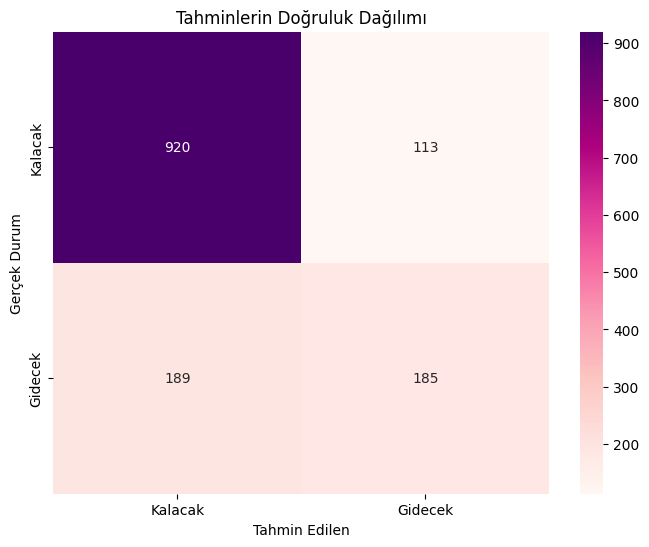

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrisi hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Kalacak', 'Gidecek'], yticklabels=['Kalacak', 'Gidecek'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.title('Tahminlerin Doğruluk Dağılımı')
plt.show()

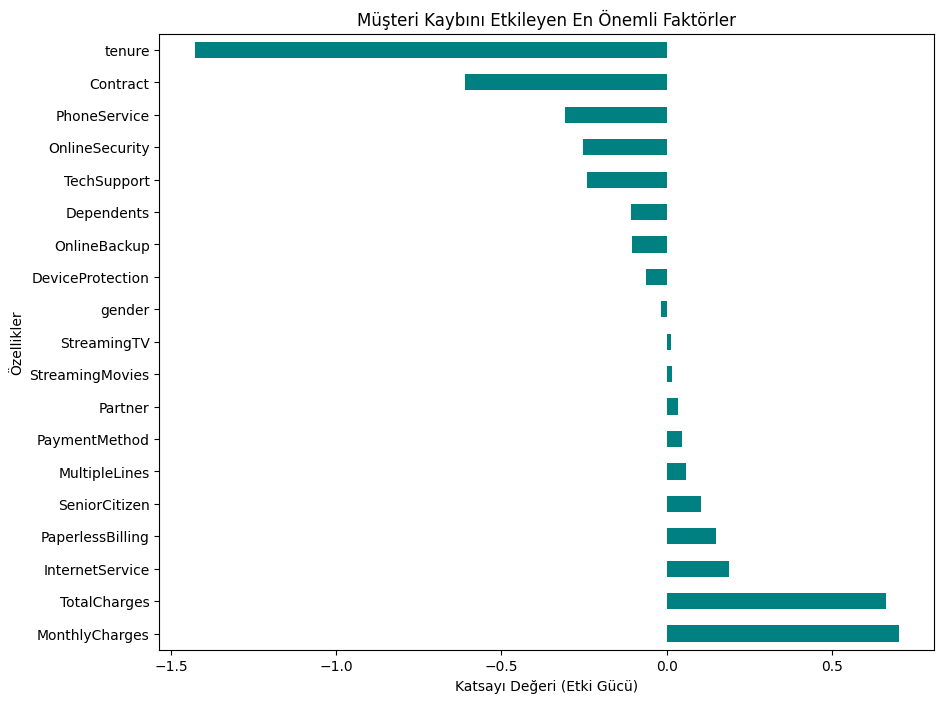

In [ ]:
# Katsayıları (weights) alalım
weights = pd.Series(model.coef_[0], index=X.columns.values)

# En etkili faktörleri sıralayalım
plt.figure(figsize=(10,8))
weights.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title("Müşteri Kaybını Etkileyen En Önemli Faktörler")
plt.xlabel("Katsayı Değeri (Etki Gücü)")
plt.ylabel("Özellikler")
plt.show()

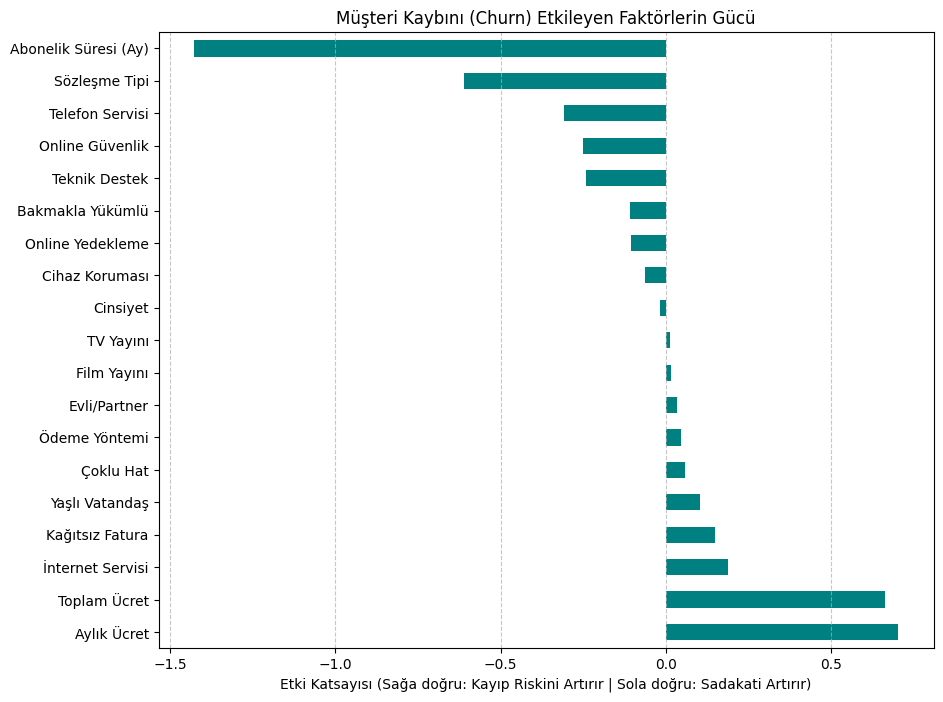

In [ ]:
# Sütun isimlerini Türkçeleştirmek için bir sözlük
tr_isimler = {
    'gender': 'Cinsiyet', 'SeniorCitizen': 'Yaşlı Vatandaş', 'Partner': 'Evli/Partner',
    'Dependents': 'Bakmakla Yükümlü', 'tenure': 'Abonelik Süresi (Ay)', 'PhoneService': 'Telefon Servisi',
    'MultipleLines': 'Çoklu Hat', 'InternetService': 'İnternet Servisi', 'OnlineSecurity': 'Online Güvenlik',
    'OnlineBackup': 'Online Yedekleme', 'DeviceProtection': 'Cihaz Koruması', 'TechSupport': 'Teknik Destek',
    'StreamingTV': 'TV Yayını', 'StreamingMovies': 'Film Yayını', 'Contract': 'Sözleşme Tipi',
    'PaperlessBilling': 'Kağıtsız Fatura', 'PaymentMethod': 'Ödeme Yöntemi', 'MonthlyCharges': 'Aylık Ücret',
    'TotalCharges': 'Toplam Ücret'
}

# Katsayıları al ve isimleri güncelle
weights = pd.Series(model.coef_[0], index=[tr_isimler.get(x, x) for x in X.columns.values])

# Görselleştirme
plt.figure(figsize=(10,8))
weights.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title("Müşteri Kaybını (Churn) Etkileyen Faktörlerin Gücü")
plt.xlabel("Etki Katsayısı (Sağa doğru: Kayıp Riskini Artırır | Sola doğru: Sadakati Artırır)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Test setinden rastgele bir müşteri seçelim (örneğin 10. müşteri)
random_customer = X_test[10].reshape(1, -1)
gercek_durum = y_test.iloc[10]

tahmin = model.predict(random_customer)
olasilik = model.predict_proba(random_customer)

print(f"Müşterinin Gerçek Durumu: {'Gitti' if gercek_durum == 1 else 'Kaldı'}")
print(f"Modelin Tahmini: {'Gidecek' if tahmin[0] == 1 else 'Kalacak'}")
print(f"Ayrılma Olasılığı: %{olasilik[0][1]*100:.2f}")

Müşterinin Gerçek Durumu: Kaldı
Modelin Tahmini: Gidecek
Ayrılma Olasılığı: %62.60


--- MÜŞTERİ ANALİZ RAPORU (ID: 10) ---
Gerçek Durum: KALDI
Model Tahmini: GİDECEK
Ayrılma Riski: %62.60
----------------------------------------
BU TAHMİNİN EN ÖNEMLİ 3 NEDENİ:
1. Abonelik Süresi (Ay): Bu özellik tahmini olumsuz etkiliyor.
2. Sözleşme Tipi: Bu özellik tahmini olumsuz etkiliyor.
3. Aylık Ücret: Bu özellik tahmini olumsuz etkiliyor.


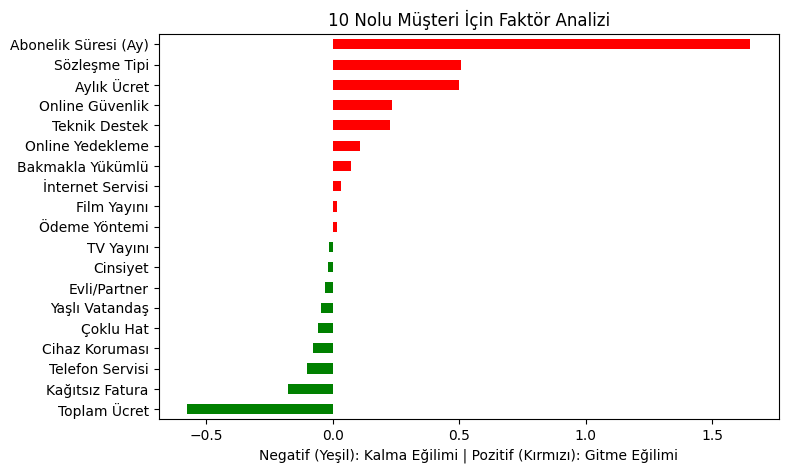

In [ ]:
import numpy as np

# Test setinden 10. müşteriyi seçelim
idx = 10
random_customer_data = X_test[idx].reshape(1, -1)
gercek_durum = y_test.iloc[idx]

# Tahmin ve Olasılık
tahmin = model.predict(random_customer_data)[0]
olasilik = model.predict_proba(random_customer_data)[0][1]

# Müşteriye özel etki analizi (Katsayılar * Müşterinin Değerleri)
# Bu işlem, o spesifik müşterinin neden giden/kalan grubuna dahil edildiğini açıklar
customer_impact = model.coef_[0] * X_test[idx]
impact_series = pd.Series(customer_impact, index=[tr_isimler.get(x, x) for x in X.columns.values])

print(f"--- MÜŞTERİ ANALİZ RAPORU (ID: {idx}) ---")
print(f"Gerçek Durum: {'AYRILDI' if gercek_durum == 1 else 'KALDI'}")
print(f"Model Tahmini: {'GİDECEK' if tahmin == 1 else 'KALACAK'}")
print(f"Ayrılma Riski: %{olasilik*100:.2f}")
print("-" * 40)

# En çok etkileyen ilk 3 faktörü bulalım
top_reasons = impact_series.sort_values(ascending=False if tahmin == 1 else True).head(3)
print("BU TAHMİNİN EN ÖNEMLİ 3 NEDENİ:")
for i, (feature, val) in enumerate(top_reasons.items(), 1):
    yon = "olumsuz etkiliyor" if tahmin == 1 else "sadakati destekliyor"
    print(f"{i}. {feature}: Bu özellik tahmini {yon}.")

# Spesifik Müşteri Etki Grafiği
plt.figure(figsize=(8, 5))
impact_series.sort_values().plot(kind='barh', color=(impact_series.sort_values() > 0).map({True: 'red', False: 'green'}))
plt.title(f"{idx} Nolu Müşteri İçin Faktör Analizi")
plt.xlabel("Negatif (Yeşil): Kalma Eğilimi | Pozitif (Kırmızı): Gitme Eğilimi")
plt.show()